# Data cleaning and EDA
In this notebook I will clean, join, and explore my data sets; and create a first simple model.

# Sections
[Cleaning and exploring datasets](#Cleaning-and-exploring-datasets)
- [Class of 2019](#Class-of-2019)
- [Class of 2018](#Class-of-2018)
- [Class of 2017](#Class-of-2017)
- [Class of 2016](#Class-of-2016)
- [Class of 2015](#Class-of-2015)
- [Class of 2014](#Class-of-2014)
- [Class of 2013](#Class-of-2013)

[Concatenate dataframes](#Concatenate-dataframes)

[EDA on merged dataframe](#EDA-on-merged-dataframe)

[First Simple Model](#First-Simple-Model)

## Cleaning and exploring datasets

The datasets for academic years 2018 and 2019 were in xlsx format and easy to download.

Gathering the data for each of the academic years 2013 - 2017 involved downloading semi-colon separated .txt files, importing them into a spreadsheet, then matching the columns to headers that were recorded in a separate .xlsx file. While performing this task, I also selected feature set to use for this project.

I also added a column to every academic year to identify the cohort by their graduation year (e.g. 2018).

I am going to do a bit more cleaning, and compile them into one DataFrame

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# import additional libraries
import pandasql as ps
from pandasql import sqldf
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# functions from .py file
import src.eda_functions as fun

# pysqldf lambda function
pysqldf = lambda q: sqldf(q, globals())

# turn off warnings
import warnings
warnings.simplefilter('ignore', category = DeprecationWarning)
warnings.simplefilter('ignore', category = FutureWarning)

# plot parameters
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 16


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 1
create a dataframe for each academic year for schools that serve grades 9 - 12.
I chose this parameter because there are some charter schools, and schools in smaller districts that serve more grades than 9-12 (and a couple that serve 10-12 or just 11-12. 

If they serve thru grade 12, they have graduation rate information. If they do not serve grade 12, they do not contain my target variable.

### Class of 2019

In [3]:
# read in the excel file
df_19 = pd.read_excel('../../data/2019-Report-Card-Public-Data-Set_clean.xlsx', sheet_name="General")
df_19.shape

(4738, 35)

In [4]:
# use clean_col function to standardize column names
fun.clean_col(df_19)

In [5]:
# pysql query to return schools serving grades thru 12
q1 = """SELECT * 
       FROM df_19
       WHERE grades_served LIKE "%12%";"""

hs_19 = pysqldf(q1)

In [6]:
hs_19.head()

,cohort,rcdts,school_name,district,city,county,district_type,district_size,school_type,grades_served,...,pupil_teacher_ratio_high_school,teacher_avg_salary,teacher_retention_rate,principal_turnover_within_6_years,percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months,percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months,percent_9th_grade_on_track,number_students_who_took_ap_classes_grade_10_total,number_students_who_took_ap_classes_grade_11_total,number_students_who_took_ap_classes_grade_12_total
0,2019,010010010260001,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,None,None,86.8,2.0,68.8,68.8,95.6,NaN,NaN,NaN
1,2019,010010020260001,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,None,None,83.9,2.0,58.1,58.1,94.0,NaN,NaN,NaN
2,2019,010010030260001,Central High School,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,None,None,83.3,2.0,75.0,73.3,94.9,NaN,NaN,NaN
3,2019,010010040260001,Unity High School,CUSD 4,Mendon,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,None,None,86.4,1.0,60.7,60.7,92.9,NaN,NaN,27.0
4,2019,010011720220003,Quincy Sr High School,Quincy SD 172,Quincy,Adams,UNIT,LARGE,HIGH SCHOOL,9 10 11 12,...,None,None,86.4,2.0,67.7,65.7,74.9,68.0,127.0,126.0


In [7]:
hs_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      720 non-null    int64  
 1   rcdts                                                                       720 non-null    object 
 2   school_name                                                                 720 non-null    object 
 3   district                                                                    720 non-null    object 
 4   city                                                                        720 non-null    object 
 5   county                                                                      720 non-null    object 
 6   district_type                                     

There are some columns that are have nulls. I am going to have to fix those.

the `percentage_student_enrollment`... nulls can be changed to zero. 
A spot check of the original files shows that nulls indicate no percent of students in that demographic. They can safely be changed to zero.

The same can be applied to columns 31-34. Fields are null because the AP classes are not offered

Will need to investigate further to see why there are missing values in 18-30.

In [8]:
hs_19.percent_student_enrollment_white.isna().sum()

38

In [9]:
hs_19.percent_student_enrollment_white.sort_values(na_position='first')

191      NaN
196      NaN
197      NaN
199      NaN
206      NaN
       ...  
159    100.0
179    100.0
454    100.0
166    100.0
422    100.0
Name: percent_student_enrollment_white, Length: 720, dtype: float64

In [10]:
hs_19.percent_student_enrollment_white.replace(np.nan, 0, inplace=True)

In [11]:
hs_19.percent_student_enrollment_white.isna().sum()

0

OK. that did the trick. Time to do the same for the other enrollment columns

In [12]:
hs_19.percent_student_enrollment_black_or_african_american.replace(np.nan, 0, inplace=True)
hs_19.percent_student_enrollment_hispanic_or_latino.replace(np.nan, 0, inplace=True)
hs_19.percent_student_enrollment_asian.replace(np.nan, 0, inplace=True)
hs_19.percent_student_enrollment_native_hawaiian_or_other_pacific_islander.replace(np.nan, 0, inplace=True)
hs_19.percent_student_enrollment_american_indian_or_alaska_native.replace(np.nan, 0, inplace=True)
hs_19.percent_student_enrollment_two_or_more_races.replace(np.nan, 0, inplace=True)

...and the AP classes columns

In [13]:
hs_19.number_students_who_took_ap_classes_grade_10_total.replace(np.nan, 0, inplace=True)
hs_19.number_students_who_took_ap_classes_grade_11_total.replace(np.nan, 0, inplace=True)
hs_19.number_students_who_took_ap_classes_grade_12_total.replace(np.nan, 0, inplace=True)

In [14]:
hs_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      720 non-null    int64  
 1   rcdts                                                                       720 non-null    object 
 2   school_name                                                                 720 non-null    object 
 3   district                                                                    720 non-null    object 
 4   city                                                                        720 non-null    object 
 5   county                                                                      720 non-null    object 
 6   district_type                                     

##### I will deal with the remaining NaNs when I get to imputing data after my initial look at all the cohort years and then create my main DataFrame.

### Class of 2018

In [15]:
# read in the excel file
df_18 = pd.read_excel('../../data/2018-Report-Card-Public-Data-Set_clean.xlsx', sheet_name="General")
df_18.shape

(4754, 35)

In [16]:
# use clean_col function to standardize column names
fun.clean_col(df_18)

In [17]:
# pysql query to return schools serving grades thru 12
q2 = """SELECT * 
       FROM df_18
       WHERE grades_served LIKE "%12%";"""

hs_18 = pysqldf(q2)

In [18]:
hs_18.head()

,cohort,rcdts,school_name,district,city,county,district_type,district_size,school_type,grades_served,...,pupil_teacher_ratio_high_school,teacher_avg_salary,teacher_retention_rate,principal_turnover_within_6_years,percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months,percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months,percent_9th_grade_on_track,number_students_who_took_ap_classes_grade_10_total,number_students_who_took_ap_classes_grade_11_total,number_students_who_took_ap_classes_grade_12_total
0,2018,010010010260001,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,None,None,90.6,2.0,81.5,81.5,100.0,NaN,NaN,NaN
1,2018,010010020260001,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,None,None,84.8,2.0,80.4,80.4,93.0,NaN,NaN,NaN
2,2018,010010030260001,Central High School,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,None,None,83.7,1.0,75.0,75.0,94.0,NaN,NaN,NaN
3,2018,010010040260001,Unity High School,CUSD 4,Mendon,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,None,None,83.7,1.0,74.0,72.0,80.0,NaN,NaN,20.0
4,2018,010011720220003,Quincy Sr High School,Quincy SD 172,Quincy,Adams,UNIT,LARGE,HIGH SCHOOL,9 10 11 12,...,None,None,81.9,3.0,68.9,68.2,51.0,109.0,110.0,148.0


In [19]:
hs_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      721 non-null    int64  
 1   rcdts                                                                       721 non-null    object 
 2   school_name                                                                 721 non-null    object 
 3   district                                                                    721 non-null    object 
 4   city                                                                        721 non-null    object 
 5   county                                                                      721 non-null    object 
 6   district_type                                     

##### Going to do the same clean up on hs_18

In [20]:
# replace Nan with zero
hs_18.percent_student_enrollment_white.replace(np.nan, 0, inplace=True)
hs_18.percent_student_enrollment_black_or_african_american.replace(np.nan, 0, inplace=True)
hs_18.percent_student_enrollment_hispanic_or_latino.replace(np.nan, 0, inplace=True)
hs_18.percent_student_enrollment_asian.replace(np.nan, 0, inplace=True)
hs_18.percent_student_enrollment_native_hawaiian_or_other_pacific_islander.replace(np.nan, 0, inplace=True)
hs_18.percent_student_enrollment_american_indian_or_alaska_native.replace(np.nan, 0, inplace=True)
hs_18.percent_student_enrollment_two_or_more_races.replace(np.nan, 0, inplace=True)
hs_18.number_students_who_took_ap_classes_grade_10_total.replace(np.nan, 0, inplace=True)
hs_18.number_students_who_took_ap_classes_grade_11_total.replace(np.nan, 0, inplace=True)
hs_18.number_students_who_took_ap_classes_grade_12_total.replace(np.nan, 0, inplace=True)

In [21]:
hs_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      721 non-null    int64  
 1   rcdts                                                                       721 non-null    object 
 2   school_name                                                                 721 non-null    object 
 3   district                                                                    721 non-null    object 
 4   city                                                                        721 non-null    object 
 5   county                                                                      721 non-null    object 
 6   district_type                                     

Moving on to 2017...

### Class of 2017

In [22]:
# read in the excel file
df_17 = pd.read_excel('../../data/2017-Report-Card-Public-Data-Set_clean.xlsx')
df_17.shape

(3796, 35)

In [23]:
# use clean_col function to standardize column names
fun.clean_col(df_17)

In [24]:
# pysql query to return schools servingn grades thru 12
q3 = """SELECT * 
       FROM df_17
       WHERE grades_served LIKE "%12%";"""

hs_17 = pysqldf(q3)

In [25]:
hs_17.head()

,cohort,rcdts,school_name,district,city,county,district_type,district_size,school_type,grades_served,...,pupil_teacher_ratio_high_school,teacher_avg_salary,teacher_retention_rate,principal_turnover_within_6_years,percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months,percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months,percent_9th_grade_on_track,number_students_who_took_ap_classes_grade_10_total,number_students_who_took_ap_classes_grade_11_total,number_students_who_took_ap_classes_grade_12_total
0,2017,10010010260001,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,10.1,"$36,294",87.5,2,66.7,66.7,84.6,0,0,0
1,2017,10010020260001,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,23.5,"$41,061",71.1,2,70.8,66.7,89.1,0,0,0
2,2017,10010030260001,Central High School,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,12.8,"$45,975",71.4,2,73.2,64.3,89.1,0,0,0
3,2017,10010040260001,Unity High School,CUSD 4,Mendon,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,17.5,"$40,873",82.1,1,64.1,59,84.3,0,0,18
4,2017,10011720220003,Quincy Sr High School,Quincy SD 172,Quincy,Adams,UNIT,LARGE,HIGH SCHOOL,9 10 11 12,...,28.5,"$41,946",77.4,2,69.8,65.1,63.1,93,122,125


In [26]:
hs_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      712 non-null    int64  
 1   rcdts                                                                       712 non-null    object 
 2   school_name                                                                 712 non-null    object 
 3   district                                                                    712 non-null    object 
 4   city                                                                        712 non-null    object 
 5   county                                                                      712 non-null    object 
 6   district_type                                     

##### Columns 21-34 should be floats, not objects

In [27]:
cols = ['high_school_dropout_rate_total',
                 'high_school_4_year_graduation_rate_total',
                 'high_school_5_year_graduation_rate_total',
                 'avg_class_size_high_school',
                 'pupil_teacher_ratio_high_school',
                 'teacher_avg_salary',
                 'teacher_retention_rate',
                 'principal_turnover_within_6_years',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
                 'percent_9th_grade_on_track',
                 'number_students_who_took_ap_classes_grade_10_total',
                 'number_students_who_took_ap_classes_grade_11_total',
                 'number_students_who_took_ap_classes_grade_12_total']


hs_17[cols] = hs_17[cols].apply(pd.to_numeric, errors='coerce', axis=1)
        

In [28]:
hs_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      712 non-null    int64  
 1   rcdts                                                                       712 non-null    object 
 2   school_name                                                                 712 non-null    object 
 3   district                                                                    712 non-null    object 
 4   city                                                                        712 non-null    object 
 5   county                                                                      712 non-null    object 
 6   district_type                                     

##### Going to replace the NaNs in AP classes. There are some other missing values I will have to deal with later.

In [29]:
# replacing nans with zeros
hs_17.number_students_who_took_ap_classes_grade_10_total.replace(np.nan, 0, inplace=True)
hs_17.number_students_who_took_ap_classes_grade_11_total.replace(np.nan, 0, inplace=True)
hs_17.number_students_who_took_ap_classes_grade_12_total.replace(np.nan, 0, inplace=True)

In [30]:
hs_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      712 non-null    int64  
 1   rcdts                                                                       712 non-null    object 
 2   school_name                                                                 712 non-null    object 
 3   district                                                                    712 non-null    object 
 4   city                                                                        712 non-null    object 
 5   county                                                                      712 non-null    object 
 6   district_type                                     

### Class of 2016

In [31]:
# read in the excel file
df_16 = pd.read_excel('../../data/2016-Report-Card-Public-Data-Set_clean.xlsx')
df_16.shape

(3735, 35)

In [32]:
# use clean_col function to standardize column names
fun.clean_col(df_16)

In [33]:
# pysql query to return schools servingn grades thru 12
q4 = """SELECT * 
       FROM df_16
       WHERE grades_served LIKE "%12%";"""

hs_16 = pysqldf(q4)

In [34]:
hs_16.head()

,cohort,rcdts,school_name,district,city,county,district_type,district_size,school_type,grades_served,...,pupil_teacher_ratio_high_school,teacher_avg_salary,teacher_retention_rate,principal_turnover_within_6_years,percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months,percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months,percent_9th_grade_on_track,number_students_who_took_ap_classes_grade_10_total,number_students_who_took_ap_classes_grade_11_total,number_students_who_took_ap_classes_grade_12_total
0,2016,10010010260001,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,8.4,"$34,801",82.1,3,65,65,77.8,0,0,0
1,2016,10010020260001,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,16.7,"$40,883",76.8,1,77.3,70.5,97.9,,,
2,2016,10010030260001,Central High School,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,13.7,"$46,882",77.4,2,76.7,70,94.3,0,0,0
3,2016,10010040260001,Unity High School,CUSD 4,Mendon,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,15.6,"$40,823",80.3,1,63.6,60,84.4,0,0,21
4,2016,10011720220003,Quincy Sr High School,Quincy SD 172,Quincy,Adams,UNIT,LARGE,HIGH SCHOOL,10 11 12,...,26.4,"$44,780",79.6,2,62.2,57.1,,144,161,157


In [35]:
hs_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      670 non-null    int64  
 1   rcdts                                                                       670 non-null    object 
 2   school_name                                                                 670 non-null    object 
 3   district                                                                    670 non-null    object 
 4   city                                                                        670 non-null    object 
 5   county                                                                      670 non-null    object 
 6   district_type                                     

##### Need to change these columns to floats

In [36]:
cols = ['high_school_dropout_rate_total',
                 'high_school_4_year_graduation_rate_total',
                 'high_school_5_year_graduation_rate_total',
                 'avg_class_size_high_school',
                 'pupil_teacher_ratio_high_school',
                 'teacher_avg_salary',
                 'teacher_retention_rate',
                 'principal_turnover_within_6_years',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
                 'percent_9th_grade_on_track',
                 'number_students_who_took_ap_classes_grade_10_total',
                 'number_students_who_took_ap_classes_grade_11_total',
                 'number_students_who_took_ap_classes_grade_12_total']


hs_16[cols] = hs_16[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [37]:
hs_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      670 non-null    int64  
 1   rcdts                                                                       670 non-null    object 
 2   school_name                                                                 670 non-null    object 
 3   district                                                                    670 non-null    object 
 4   city                                                                        670 non-null    object 
 5   county                                                                      670 non-null    object 
 6   district_type                                     

##### and again, replace NaN with zero where I can, the rest will have to be handled later.

In [38]:
# replacing nans with zeros
hs_16.number_students_who_took_ap_classes_grade_10_total.replace(np.nan, 0, inplace=True)
hs_16.number_students_who_took_ap_classes_grade_11_total.replace(np.nan, 0, inplace=True)
hs_16.number_students_who_took_ap_classes_grade_12_total.replace(np.nan, 0, inplace=True)


### Class of 2015


In [39]:
# read in the excel file
df_15 = pd.read_excel('../../data/2015-Report-Card-Public-Data-Set_clean.xlsx')
df_15.shape

(3764, 35)

In [40]:
# use clean_col function to standardize column names
fun.clean_col(df_15)

In [41]:
# pysql query to return schools serving grades thru 12
q5 = """SELECT * 
       FROM df_15
       WHERE grades_served LIKE "%12%";"""

hs_15 = pysqldf(q5)

In [42]:
hs_15.head()

,cohort,rcdts,school_name,district,city,county,district_type,district_size,school_type,grades_served,...,pupil_teacher_ratio_high_school,teacher_avg_salary,teacher_retention_rate,principal_turnover_within_6_years,percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months,percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months,percent_9th_grade_on_track,number_students_who_took_ap_classes_grade_10_total,number_students_who_took_ap_classes_grade_11_total,number_students_who_took_ap_classes_grade_12_total
0,2015,10010010260001,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,7.6,"$33,771",73.7,3,72.7,69.7,93,None,None,None
1,2015,10010020260001,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,17.2,"$41,447",74.1,1,81.6,77.6,97.4,None,None,None
2,2015,10010030260001,Central High School,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,15.1,"$46,534",74.6,2,64.1,60.9,95.8,None,None,None
3,2015,10010040260001,Unity High School,CUSD 4,Mendon,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,14.4,"$40,549",82,1,69.8,69.8,71.7,None,None,None
4,2015,10011720220003,Quincy Sr High School,Quincy SD 172,Quincy,Adams,UNIT,LARGE,HIGH SCHOOL,10 11 12,...,22.6,"$44,849",81.7,2,66.2,62.7,,None,None,None


In [43]:
hs_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      671 non-null    int64  
 1   rcdts                                                                       671 non-null    object 
 2   school_name                                                                 671 non-null    object 
 3   district                                                                    671 non-null    object 
 4   city                                                                        671 non-null    object 
 5   county                                                                      671 non-null    object 
 6   district_type                                     

In [44]:
# convert objects to floats

cols = ['high_school_dropout_rate_total',
                 'high_school_4_year_graduation_rate_total',
                 'high_school_5_year_graduation_rate_total',
                 'avg_class_size_high_school',
                 'pupil_teacher_ratio_high_school',
                 'teacher_avg_salary',
                 'teacher_retention_rate',
                 'principal_turnover_within_6_years',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
                 'percent_9th_grade_on_track',
                 'number_students_who_took_ap_classes_grade_10_total',
                 'number_students_who_took_ap_classes_grade_11_total',
                 'number_students_who_took_ap_classes_grade_12_total']


hs_15[cols] = hs_15[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [45]:
hs_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      671 non-null    int64  
 1   rcdts                                                                       671 non-null    object 
 2   school_name                                                                 671 non-null    object 
 3   district                                                                    671 non-null    object 
 4   city                                                                        671 non-null    object 
 5   county                                                                      671 non-null    object 
 6   district_type                                     

##### There are a lot of missing values in this cohort. I'll need to investigate what happened.
Was it recorded incorrectly, or not at all?

### Class of 2014

In [46]:
# read in the excel file
df_14 = pd.read_excel('../../data/2014-Report-Card-Public-Data-Set_clean.xlsx')
df_14.shape

(3794, 35)

In [47]:
# use clean_col function to standardize column names
fun.clean_col(df_14)

In [48]:
# pysql query to return schools serving grades thru 12
q6 = """SELECT * 
       FROM df_14
       WHERE grades_served LIKE "%12%";"""

hs_14 = pysqldf(q6)

In [49]:
hs_14.head()

,cohort,rcdts,school_name,district,city,county,district_type,district_size,school_type,grades_served,...,pupil_teacher_ratio_high_school,teacher_avg_salary,teacher_retention_rate,principal_turnover_within_6_years,percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months,percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months,percent_9th_grade_on_track,number_students_who_took_ap_classes_grade_10_total,number_students_who_took_ap_classes_grade_11_total,number_students_who_took_ap_classes_grade_12_total
0,2014,10010010260001,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,9.7,"$40,711",69.5,2,None,None,None,None,None,None
1,2014,10010020260001,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,14.8,"$40,764",86,1,None,None,None,None,None,None
2,2014,10010030260001,Central High School,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,12.4,"$46,756",80,2,None,None,None,None,None,None
3,2014,10010040260001,Unity High School,CUSD 4,Mendon,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,13.4,"$40,744",81.7,1,None,None,None,None,None,None
4,2014,10011720220003,Quincy Sr High School,Quincy SD 172,Quincy,Adams,UNIT,LARGE,HIGH SCHOOL,10 11 12,...,19.1,"$44,812",87.6,3,None,None,None,None,None,None


In [50]:
hs_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      675 non-null    int64  
 1   rcdts                                                                       675 non-null    object 
 2   school_name                                                                 675 non-null    object 
 3   district                                                                    675 non-null    object 
 4   city                                                                        675 non-null    object 
 5   county                                                                      675 non-null    object 
 6   district_type                                     

In [51]:
# convert objects to floats

cols = ['high_school_dropout_rate_total',
                 'high_school_4_year_graduation_rate_total',
                 'high_school_5_year_graduation_rate_total',
                 'avg_class_size_high_school',
                 'pupil_teacher_ratio_high_school',
                 'teacher_avg_salary',
                 'teacher_retention_rate',
                 'principal_turnover_within_6_years',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
                 'percent_9th_grade_on_track',
                 'number_students_who_took_ap_classes_grade_10_total',
                 'number_students_who_took_ap_classes_grade_11_total',
                 'number_students_who_took_ap_classes_grade_12_total']


hs_14[cols] = hs_14[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [52]:
hs_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      675 non-null    int64  
 1   rcdts                                                                       675 non-null    object 
 2   school_name                                                                 675 non-null    object 
 3   district                                                                    675 non-null    object 
 4   city                                                                        675 non-null    object 
 5   county                                                                      675 non-null    object 
 6   district_type                                     

##### Again there are some empty columns that warrant further investigation

### Class of 2013

In [53]:
# read in the excel file
df_13 = pd.read_excel('../../data/2013-Report-Card-Public-Data-Set_clean.xlsx')
df_13.shape

(3862, 35)

In [54]:
# use clean_col function to standardize column names
fun.clean_col(df_13)

In [55]:
# pysql query to return schools serving grades thru 12
q7 = """SELECT * 
       FROM df_13
       WHERE grades_served LIKE "%12%";"""

hs_13 = pysqldf(q7)

In [56]:
hs_13.head()

,cohort,rcdts,school_name,district,city,county,district_type,district_size,school_type,grades_served,...,pupil_teacher_ratio_high_school,teacher_avg_salary,teacher_retention_rate,principal_turnover_within_6_years,percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months,percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months,percent_9th_grade_on_track,number_students_who_took_ap_classes_grade_10_total,number_students_who_took_ap_classes_grade_11_total,number_students_who_took_ap_classes_grade_12_total
0,2013,10010010260001,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,SMALL,HIGH SCHOOL,7 8 9 10 11 12,...,None,None,None,None,None,None,None,None,None,None
1,2013,10010020260001,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,None,None,None,None,None,None,None,None,None,None
2,2013,10010030260001,Central High School,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,None,None,None,None,None,None,None,None,None,None
3,2013,10010040260001,Unity High School,CUSD 4,Mendon,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,None,None,None,None,None,None,None,None,None,None
4,2013,10011720220003,Quincy Sr High School,Quincy SD 172,Quincy,Adams,UNIT,LARGE,HIGH SCHOOL,10 11 12,...,None,None,None,None,None,None,None,None,None,None


In [57]:
hs_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      675 non-null    int64  
 1   rcdts                                                                       675 non-null    object 
 2   school_name                                                                 675 non-null    object 
 3   district                                                                    675 non-null    object 
 4   city                                                                        675 non-null    object 
 5   county                                                                      675 non-null    object 
 6   district_type                                     

In [58]:
# convert objects to floats

cols = ['high_school_dropout_rate_total',
                 'high_school_4_year_graduation_rate_total',
                 'high_school_5_year_graduation_rate_total',
                 'avg_class_size_high_school',
                 'pupil_teacher_ratio_high_school',
                 'teacher_avg_salary',
                 'teacher_retention_rate',
                 'principal_turnover_within_6_years',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
                 'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
                 'percent_9th_grade_on_track',
                 'number_students_who_took_ap_classes_grade_10_total',
                 'number_students_who_took_ap_classes_grade_11_total',
                 'number_students_who_took_ap_classes_grade_12_total']


hs_13[cols] = hs_13[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [59]:
hs_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   cohort                                                                      675 non-null    int64  
 1   rcdts                                                                       675 non-null    object 
 2   school_name                                                                 675 non-null    object 
 3   district                                                                    675 non-null    object 
 4   city                                                                        675 non-null    object 
 5   county                                                                      675 non-null    object 
 6   district_type                                     

##### and even more empty columns!

## Concatenate dataframes 
create a matrix where one row is the cohort of a school (e.g. cohort 2018 for school xxx1, cohort 2017 for xxx1, cohort 2018 for school yyy2, cohort 2017 for school yyy2).

In [60]:
columns_check= list(hs_19.columns)

dataframes_check = [hs_13,hs_14, hs_15, hs_16, hs_17, hs_18]
missing = {}
for idx, dataframe in enumerate(dataframes_check):
    missing_columns = [x for x in columns_check if x not in dataframes_check[idx].columns]
    if missing_columns:
        missing[idx]=missing_columns

In [61]:
missing

{}

In [62]:
final_features=['cohort','rcdts','school_name','district','city','county','district_type', 'district_size',
                'school_type','grades_served','percent_student_enrollment_white',
                'percent_student_enrollment_black_or_african_american',
                'percent_student_enrollment_hispanic_or_latino','percent_student_enrollment_asian',
                'percent_student_enrollment_native_hawaiian_or_other_pacific_islander','percent_student_enrollment_american_indian_or_alaska_native','percent_student_enrollment_two_or_more_races',
                'number_student_enrollment','total_number_of_school_days','student_attendance_rate','student_chronic_truancy_rate',
                'high_school_dropout_rate_total','high_school_4_year_graduation_rate_total','high_school_5_year_graduation_rate_total',
                'avg_class_size_high_school','pupil_teacher_ratio_high_school','teacher_retention_rate',
                'principal_turnover_within_6_years','percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
                'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months','percent_9th_grade_on_track',
                'number_students_who_took_ap_classes_grade_10_total','number_students_who_took_ap_classes_grade_11_total',
                'number_students_who_took_ap_classes_grade_12_total']
final_features
all_dfs=[hs_13, hs_14, hs_15, hs_16, hs_17, hs_18, hs_19]
filtered_dfs=[]

for dataframe in all_dfs:
    filtered_dfs.append(dataframe[final_features])
    
merged_df = pd.concat(all_dfs) 

In [63]:
# save this df to a csv for later use in final notebook
data_df = merged_df
data_df.to_csv('../../data/merged_df.csv', index=False)

## EDA on merged dataframe
additional cleaning and sorting 

In [64]:
fun.proj_eda(merged_df)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,null_sum,null_pct,dtypes,count,mean,median,min,max
avg_class_size_high_school,73,0.015070,float64,4771,17.819157,18.00,0.3,81
city,0,0.000000,object,4844,NaN,NaN,Abingdon,Zion
cohort,0,0.000000,int64,4844,2016.055326,2016.00,2013,2019
county,0,0.000000,object,4844,NaN,NaN,Adams,Woodford
district,0,0.000000,object,4844,NaN,NaN,A-C Central CUSD 262,Zion-Benton Twp HSD 126
district_size,0,0.000000,object,4844,NaN,NaN,LARGE,SMALL
district_type,0,0.000000,object,4844,NaN,NaN,HIGH SCHOOL,UNIT
grades_served,0,0.000000,object,4844,NaN,NaN,10 11 12,PK K 1 2 3 4 5 6 7 8 9 10 11 12
high_school_4_year_graduation_rate_total,29,0.005987,float64,4815,85.428744,88.90,0,100
high_school_5_year_graduation_rate_total,91,0.018786,float64,4753,87.559142,90.50,0,100


I may almost be done cleaning, right?

In [65]:
# cohort should be a category
merged_df['cohort'] = merged_df['cohort'].astype('object')
# check that again
list(merged_df.select_dtypes(['object', 'bool']))

['cohort',
 'rcdts',
 'school_name',
 'district',
 'city',
 'county',
 'district_type',
 'district_size',
 'school_type',
 'grades_served',
 'student_chronic_truancy_rate',
 'pupil_teacher_ratio_high_school',
 'teacher_avg_salary']

##### Now to make some decisions about features to keep and dealing with NaNs

In [66]:
merged_df.columns.to_list()

['cohort',
 'rcdts',
 'school_name',
 'district',
 'city',
 'county',
 'district_type',
 'district_size',
 'school_type',
 'grades_served',
 'percent_student_enrollment_white',
 'percent_student_enrollment_black_or_african_american',
 'percent_student_enrollment_hispanic_or_latino',
 'percent_student_enrollment_asian',
 'percent_student_enrollment_native_hawaiian_or_other_pacific_islander',
 'percent_student_enrollment_american_indian_or_alaska_native',
 'percent_student_enrollment_two_or_more_races',
 'number_student_enrollment',
 'total_number_of_school_days',
 'student_attendance_rate',
 'student_chronic_truancy_rate',
 'high_school_dropout_rate_total',
 'high_school_4_year_graduation_rate_total',
 'high_school_5_year_graduation_rate_total',
 'avg_class_size_high_school',
 'pupil_teacher_ratio_high_school',
 'teacher_avg_salary',
 'teacher_retention_rate',
 'principal_turnover_within_6_years',
 'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
 'percent_g

In [67]:
merged_df.isnull().sum().sort_values(ascending=False)

teacher_avg_salary                                                            4844
pupil_teacher_ratio_high_school                                               2123
number_students_who_took_ap_classes_grade_12_total                            2021
number_students_who_took_ap_classes_grade_11_total                            2021
number_students_who_took_ap_classes_grade_10_total                            2021
percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months    1561
percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months    1561
percent_9th_grade_on_track                                                    1487
teacher_retention_rate                                                         811
principal_turnover_within_6_years                                              781
high_school_5_year_graduation_rate_total                                        91
avg_class_size_high_school                                                      73
high

##### Starting from the top down:
- Avg teacher salary will be dropped. The data is reported at the disctrict level, not by every school. Also I've reconsidered the usefulness of that item.
- Pupil:Teacher ratio. I'm going to drop this as well. It was reported by school for 2013-2017, but at a district level for 2018 and 2019.
- AP classes. I feel like this is important. It wasn't entered for 2013 or 2014, which is a lot of missing values. Since they are more than 50% NaNs (or zeros), I should drop them.- Percent of Graduates columns. Replace with mean.
- Percent of 9th graders. Replace with mean.
- Principal turnover. I'm going to drop. Like teacher salary, I'm not sure how important it really is.
- Teacher retention rate. Replace with mean. I feel like this is more important than principal turnover.
- 5 year graduation rate. Replace with mean.
- Avg class size. Replace with mean.
- Dropout rate. Replace with mean.

- 4 year grad rate. Since this is the target, I need to do some more digging and try to find a real explanation for these nans.

__Edit__: Since it was a small number missing in each year, I returned to the datasets, and ISBE website to research and can confirm that these observations should be dropped. Some of these zeros were from new charter schools who began classes in 2013 or 2014 so did not have any graduations for the first three years they were open. They recorded zero as the graduation rate for those first few years.

__Additional Note__: The nans for Graduate and % 9th grade on track can also be changed to zeros.

In [68]:
# removing rows that have nans in target variable 
merged_df.dropna(subset=['high_school_4_year_graduation_rate_total'])

,cohort,rcdts,school_name,district,city,county,district_type,district_size,school_type,grades_served,...,pupil_teacher_ratio_high_school,teacher_avg_salary,teacher_retention_rate,principal_turnover_within_6_years,percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months,percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months,percent_9th_grade_on_track,number_students_who_took_ap_classes_grade_10_total,number_students_who_took_ap_classes_grade_11_total,number_students_who_took_ap_classes_grade_12_total
0,2013,10010010260001,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,SMALL,HIGH SCHOOL,7 8 9 10 11 12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,10010020260001,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,10010030260001,Central High School,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,10010040260001,Unity High School,CUSD 4,Mendon,Adams,UNIT,MEDIUM,HIGH SCHOOL,9 10 11 12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,10011720220003,Quincy Sr High School,Quincy SD 172,Quincy,Adams,UNIT,LARGE,HIGH SCHOOL,10 11 12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2019,601054280303028,School District 428 IYC-HRB,IDJJ Sch Dist 428,Harrisburg,Dept Of Corrections,UNIT,LARGE,HIGH SCHOOL,7 8 9 10 11 12,...,None,None,77.8,1.0,5.6,5.6,NaN,0.0,0.0,0.0
716,2019,601054280303050,IYC Chicago,IDJJ Sch Dist 428,Chicago,Dept Of Corrections,UNIT,LARGE,HIGH SCHOOL,6 7 8 9 10 11 12,...,None,None,60.7,2.0,22.2,22.2,NaN,0.0,0.0,0.0
717,2019,651089010800001,University High School,ISU Laboratory Schools,Normal,State Of Illinois,UNIT,LARGE,HIGH SCHOOL,9 10 11 12,...,None,None,88.1,1.0,94.1,94.1,100.0,40.0,80.0,86.0
718,2019,651089020800001,University of Illinois High Sch,University of Ill Lab School,Urbana,State Of Illinois,HIGH SCHOOL,LARGE,HIGH SCHOOL,7 8 9 10 11 12,...,None,None,NaN,NaN,88.5,88.5,0.0,0.0,0.0,0.0


#### Dropping columns

In [69]:
merged_df = merged_df.drop(['teacher_avg_salary','principal_turnover_within_6_years', 
                            'pupil_teacher_ratio_high_school', 'number_students_who_took_ap_classes_grade_12_total',
                            'number_students_who_took_ap_classes_grade_11_total', 
                            'number_students_who_took_ap_classes_grade_10_total'], axis=1)

merged_df.isnull().sum().sort_values(ascending=False)

percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months    1561
percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months    1561
percent_9th_grade_on_track                                                    1487
teacher_retention_rate                                                         811
high_school_5_year_graduation_rate_total                                        91
avg_class_size_high_school                                                      73
high_school_4_year_graduation_rate_total                                        29
student_chronic_truancy_rate                                                    21
student_attendance_rate                                                         19
total_number_of_school_days                                                     10
high_school_dropout_rate_total                                                   3
school_type                                                                      0
rcdt

#### Replacing NaNs with zeros

In [70]:
zeros = merged_df.loc[:, ('high_school_4_year_graduation_rate_total',
                        'high_school_5_year_graduation_rate_total',
                        'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
                        'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
                        'percent_9th_grade_on_track')]

for zero in zeros:
    merged_df[zero].fillna(0, inplace=True)
    
merged_df.isnull().sum().sort_values(ascending=False)

teacher_retention_rate                                                        811
avg_class_size_high_school                                                     73
student_chronic_truancy_rate                                                   21
student_attendance_rate                                                        19
total_number_of_school_days                                                    10
high_school_dropout_rate_total                                                  3
city                                                                            0
school_type                                                                     0
district_size                                                                   0
district_type                                                                   0
county                                                                          0
percent_9th_grade_on_track                                                      0
percent_student_

#### This last group of NaNs will need to be imputed. 
I will perform my train test split first and use SimpleImputer to fit the Train Set, and transform the Val and Test sets.


As a reminder:
- Train set is 2013-2017
- Validation set is 2018
- Test set is 2019

In [71]:
# pysql query to return the 2019 cohort
q8 = """SELECT * 
       FROM merged_df
       WHERE cohort IS "2019";"""

test_set = pysqldf(q8)

test_set.shape

(720, 29)

In [72]:
# pysql query to return the 2018 cohort
q9 = """SELECT * 
       FROM merged_df
       WHERE cohort IS "2018";"""

val_set = pysqldf(q9)

val_set.shape

(721, 29)

In [73]:
# pysql query to return the 2013-2017 cohorts
q10 = """SELECT * 
       FROM merged_df
       WHERE cohort IS NOT "2018" 
       AND cohort IS NOT "2019";"""

train_set = pysqldf(q10)

train_set.shape

(3403, 29)

#### Going to save these to csv files for the model notebook

In [74]:
test_set.to_csv('../../data/test_set.csv', index=False)
val_set.to_csv('../../data/val_set.csv', index=False)
train_set.to_csv('../../data/train_set.csv', index=False)

### EDA and correlations

First going to pull out just the numberic features

In [75]:
num_features = train_set.select_dtypes(['float64', 'int64'])

In [76]:
num_features.columns

Index(['cohort', 'percent_student_enrollment_white',
       'percent_student_enrollment_black_or_african_american',
       'percent_student_enrollment_hispanic_or_latino',
       'percent_student_enrollment_asian',
       'percent_student_enrollment_native_hawaiian_or_other_pacific_islander',
       'percent_student_enrollment_american_indian_or_alaska_native',
       'percent_student_enrollment_two_or_more_races',
       'number_student_enrollment', 'total_number_of_school_days',
       'student_attendance_rate', 'high_school_dropout_rate_total',
       'high_school_4_year_graduation_rate_total',
       'high_school_5_year_graduation_rate_total',
       'avg_class_size_high_school', 'teacher_retention_rate',
       'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
       'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
       'percent_9th_grade_on_track'],
      dtype='object')

In [77]:
# cohort should be a category
train_set['cohort'] = train_set['cohort'].astype('object')
# check that again
num_features = train_set.select_dtypes(['float64', 'int64'])
num_features.columns

Index(['percent_student_enrollment_white',
       'percent_student_enrollment_black_or_african_american',
       'percent_student_enrollment_hispanic_or_latino',
       'percent_student_enrollment_asian',
       'percent_student_enrollment_native_hawaiian_or_other_pacific_islander',
       'percent_student_enrollment_american_indian_or_alaska_native',
       'percent_student_enrollment_two_or_more_races',
       'number_student_enrollment', 'total_number_of_school_days',
       'student_attendance_rate', 'high_school_dropout_rate_total',
       'high_school_4_year_graduation_rate_total',
       'high_school_5_year_graduation_rate_total',
       'avg_class_size_high_school', 'teacher_retention_rate',
       'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months',
       'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
       'percent_9th_grade_on_track'],
      dtype='object')

I'm curious how similar the trends are for 4-year and 5-year graduation rates

In [78]:
train_set.loc[:, ('high_school_4_year_graduation_rate_total', 'high_school_5_year_graduation_rate_total')].describe()

,high_school_4_year_graduation_rate_total,high_school_5_year_graduation_rate_total
count,3403.000000,3403.000000
mean,84.806847,86.171907
std,14.584518,15.825276
min,0.000000,0.000000
25%,81.500000,83.600000
50%,88.500000,90.100000
75%,93.300000,94.500000
max,100.000000,100.000000


Not surprising that they are close to identical. Guessing they will have the highest correlation.

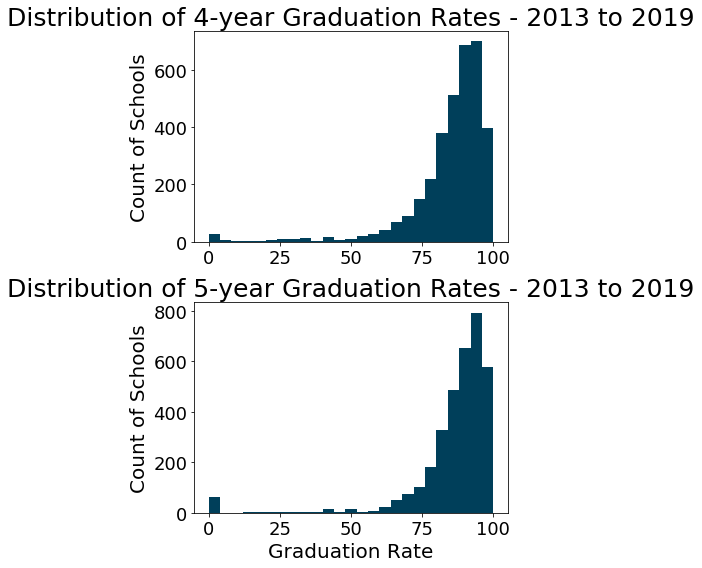

In [79]:
fig, axes = plt.subplots(2, 1, figsize=(8,8))

axes[0].hist(train_set.high_school_4_year_graduation_rate_total, bins = 25, color='#003f5a')
axes[0].set_title('Distribution of 4-year Graduation Rates - 2013 to 2019')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count of Schools')

axes[1].hist(train_set.high_school_5_year_graduation_rate_total, bins = 25, color='#003f5a')
axes[1].set_title('Distribution of 5-year Graduation Rates - 2013 to 2019')
axes[1].set_xlabel('Graduation Rate')
axes[1].set_ylabel('Count of Schools')

plt.tight_layout()
plt.savefig('../../reports/figures/grad_rate_hist.png')
plt.show();

That is a very left skewed distribution. I should try log transforming the target to see if that makes a difference.

Time to take a look at correlations with the heatmap function

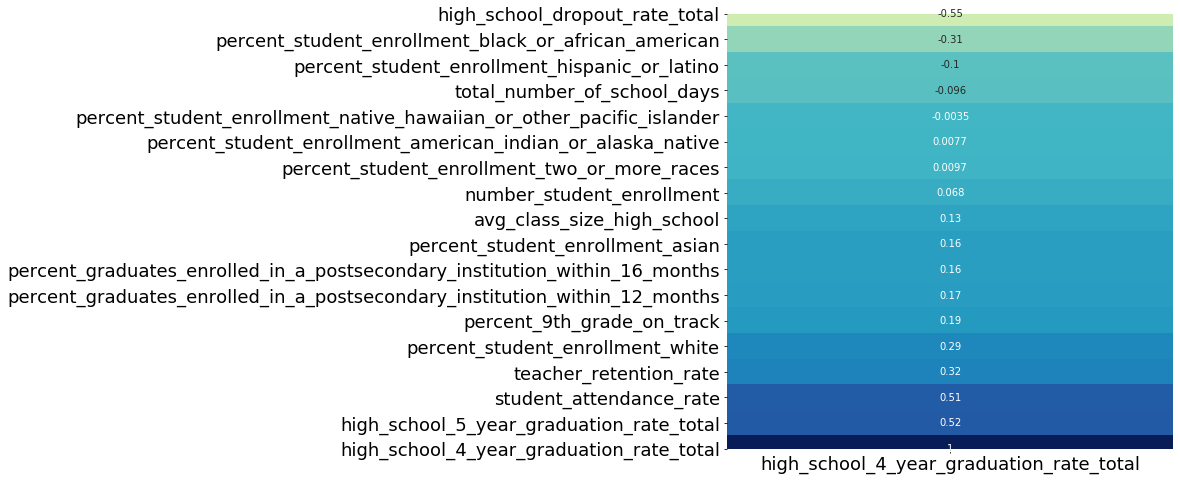

In [80]:
fun.heatmap(num_features, 'high_school_4_year_graduation_rate_total')
plt.savefig('../../reports/figures/correlations_map.png')
plt.show();

In [81]:
corrs = sorted(num_features.corr()['high_school_4_year_graduation_rate_total'].values, key=abs)

In [82]:
# Select top ten predictors
top_corrs = corrs[-11:-1]
# Store name of predictors in list
top_feats = ['% Student Enrollment Asian', '% Grads to PostSecondary w/in 16 Months', 
             '% Grads to PostSecondary w/in 12 Months', 
             '% 9th Grade On Track','% Student Enrollment White', '% Student Enrollment Black',
             'Teacher Retention Rate', 'Student Attendance Rate', 
             '5-year Graduation Rate', 'High School Dropout Rate']

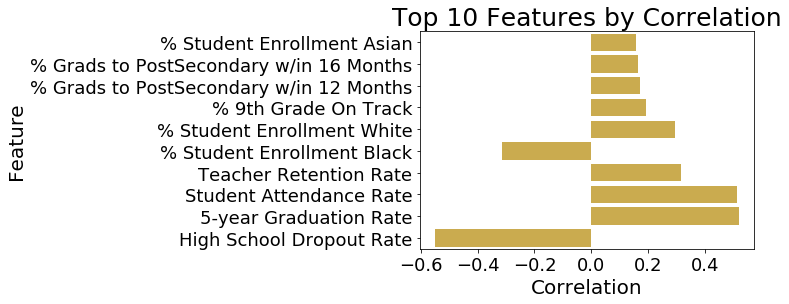

In [83]:
# Barplot with horizontal line at 0
plot = sns.barplot(top_corrs, top_feats, orient='h', color='#deb53a')

# Set title and labels
plot.set_title('Top 10 Features by Correlation')
plot.set_xlabel('Correlation')
plot.set_ylabel('Feature');

Not surprisingly, features such as 5-year graduation rate, student attendance rate, and teacher retention rate have a strong positive correlation to 4-year graduation. While high school dropout rate has a strong negative correlation.

The correlation between demographic groups and graduation rates is not a comment on race but is an indication of segregation of populations and acceses to resources and funding for schools.

**A note about 4-year vs 5-year graduation**: A student who completes all graduation requirements in the traditional 4-year schedule is included in the 4-year graduation rate total. If a student takes an extra year to complete all graduation requirements they are included in the 5-year graduation rate total. They may graduate in the same year, but are counted separately in the data. 

**This is more than just a correlation, or a strong predictor.** Upon review, this information causes a data leak. Even though 5-yera graduation rate is not the target variable, it contains information that would not be known to anyone running the model to predict an outcome. This feature will have to be removed before moving forward.

In [84]:
top_10 = train_set[['high_school_4_year_graduation_rate_total','high_school_dropout_rate_total', 'high_school_5_year_graduation_rate_total',
                    'student_attendance_rate', 'teacher_retention_rate', 'percent_student_enrollment_black_or_african_american',
                    'percent_student_enrollment_white', 'percent_9th_grade_on_track', 
                    'percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
                    'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months', 'percent_student_enrollment_asian']]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


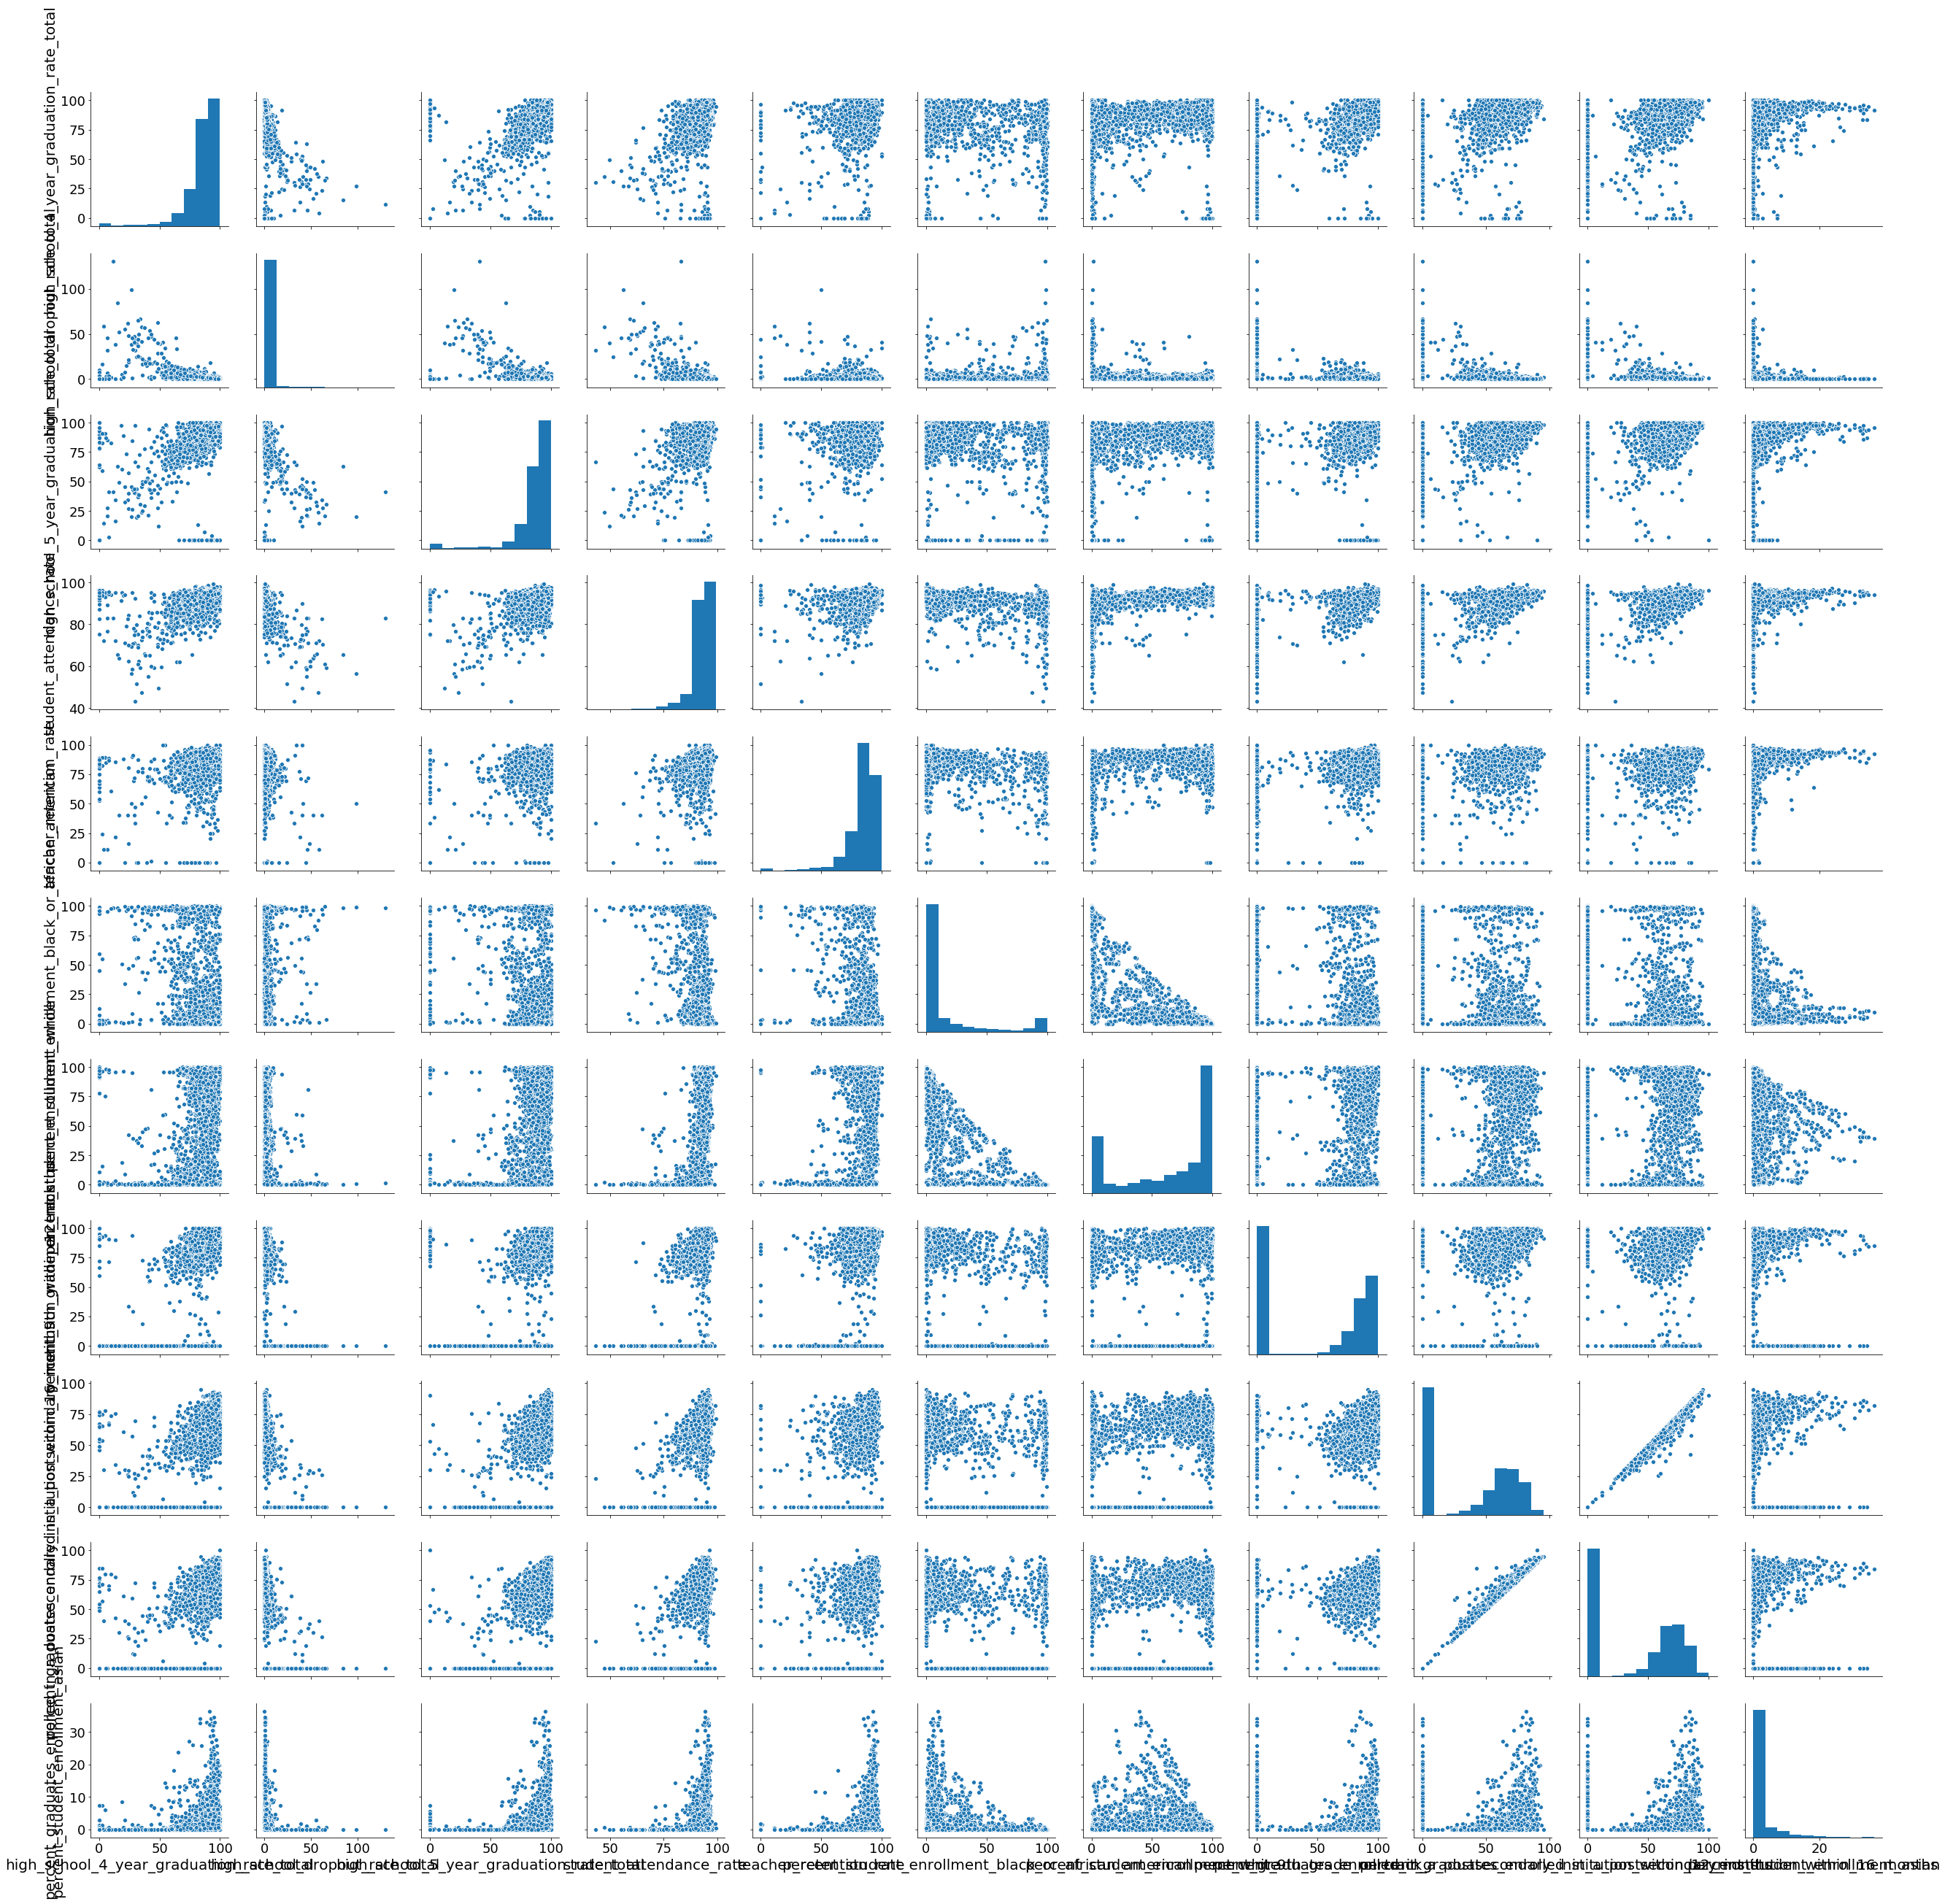

In [85]:
sns.pairplot(data= top_10, height=4);

There are a few interesting results in the pair plots.
taking a closer look at Student Enrollment - Black and Student Enrollment - White

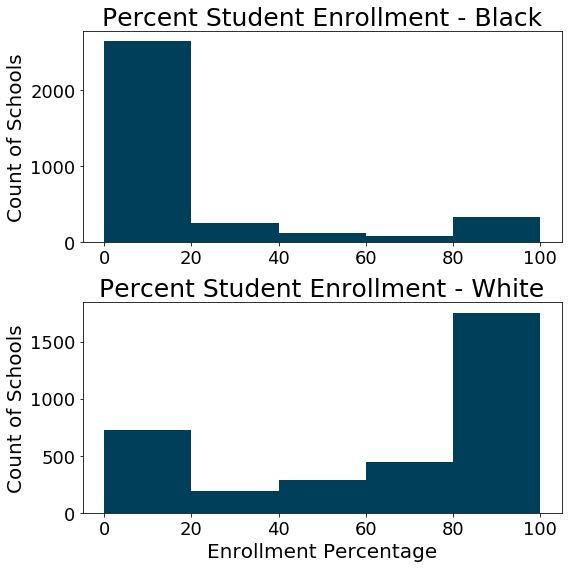

In [86]:
fig, axes = plt.subplots(2, 1, figsize=(8,8))

axes[0].hist(train_set.percent_student_enrollment_black_or_african_american, bins = 5, color='#003f5a')
axes[0].set_title('Percent Student Enrollment - Black')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count of Schools')

axes[1].hist(train_set.percent_student_enrollment_white, bins = 5, color='#003f5a')
axes[1].set_title('Percent Student Enrollment - White')
axes[1].set_xlabel('Enrollment Percentage')
axes[1].set_ylabel('Count of Schools')

plt.tight_layout()
plt.savefig('../../reports/figures/enrollmenthist.png')
plt.show();

These histograms show that for well over half of the schools  Black or African American students make up less than 20% of the population. Also, approximately half of the schools have a student population that is at least 80% White.
That accounts for the correlation values.

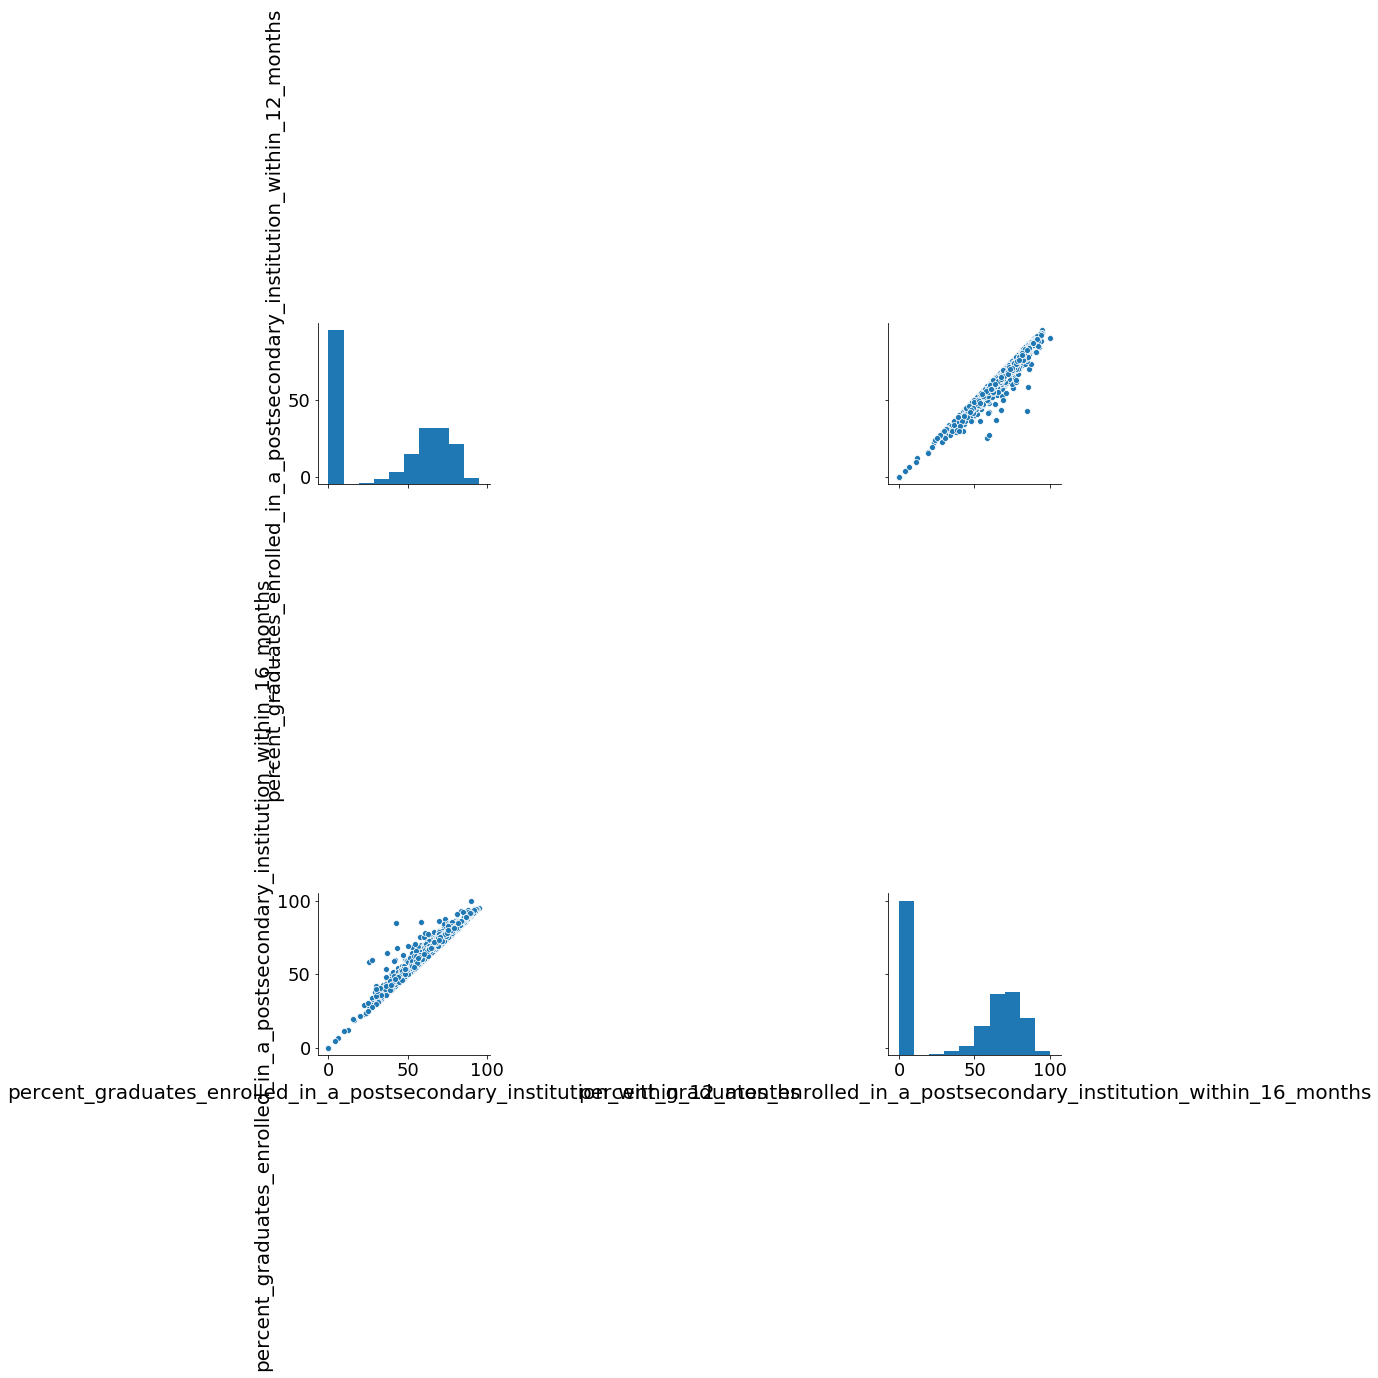

In [87]:
post_grad = train_set[['percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months',
                    'percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months']]
sns.pairplot(data= post_grad, height=8);

In [88]:
num_features = num_features.drop(['high_school_5_year_graduation_rate_total'], axis=1)

## First Simple Model

I am going to use a basic OLS Linear Regression to set a base line.

And I will use [this forward selected model](#https://planspace.org/20150423-forward_selection_with_statsmodels/) to select the features.
   
   "It tries to optimize adjusted R-squared by adding features that help the most one at a time until the score goes down or you run out of features."

In [89]:
fsm = fun.forward_selected(num_features, 'high_school_4_year_graduation_rate_total')
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     high_school_4_year_graduation_rate_total   R-squared:                       0.378
Model:                                                  OLS   Adj. R-squared:                  0.375
Method:                                       Least Squares   F-statistic:                     146.8
Date:                                      Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                                              10:27:34   Log-Likelihood:                -13110.
No. Observations:                                      3401   AIC:                         2.625e+04
Df Residuals:                                          3386   BIC:                         2.634e+04
Df Model:                                                14                                         
Covariance Type:                                  nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      7.4654    274.990      0.027      0.978    -531.698     546.629
high_school_dropout_rate_total                                                -0.8674      0.043    -20.401      0.000      -0.951      -0.784
student_attendance_rate                                                        0.5826      0.066      8.886      0.000       0.454       0.711
percent_9th_grade_on_track                                                     0.0591      0.011      5.600      0.000       0.038       0.080
percent_student_enrollment_asian                                               0.6127      2.741      0.224      0.823      -4.762       5.988
percent_student_enrollment_white                                               0.3253      2.741      0.119      0.906      -5.049       5.700
percent_student_enrollment_two_or_more_races                                   0.0210      2.742      0.008      0.994      -5.354       5.397
percent_graduates_enrolled_in_a_postsecondary_institution_within_16_months    -0.2381      0.084     -2.837      0.005      -0.403      -0.074
percent_graduates_enrolled_in_a_postsecondary_institution_within_12_months     0.2124      0.087      2.447      0.014       0.042       0.383
number_student_enrollment                                                      0.0007      0.000      2.700      0.007       0.000       0.001
percent_student_enrollment_native_hawaiian_or_other_pacific_islander          -1.3193      2.897     -0.455      0.649      -6.999       4.360
percent_student_enrollment_hispanic_or_latino                                  0.2757      2.741      0.101      0.920      -5.099       5.651
total_number_of_school_days                                                   -0.0411      0.087     -0.472      0.637      -0.212       0.130
percent_student_enrollment_american_indian_or_alaska_native                    0.3710      2.799      0.133      0.895      -5.118       5.860
percent_student_enrollment_black_or_african_american                           0.2871      2.741      0.105      0.917      -5.087       5.661
==============================================================================
Omnibus:                     2966.041   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113651.823
Skew:                         

#### Result Adjusted R-squared of 0.375

##### P-values for 5 of the top 10 features by correlation have a p-value score very close to 0, which means that they are significant.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


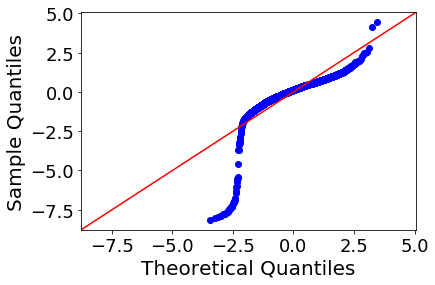

In [90]:
residuals = fsm.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show();

    Q-Q plots that exhibit this behavior usually mean the data has more extreme values than would be expected if they truly came from a Normal distribution.
That is not surprising, given the left skew of the graduation rates.

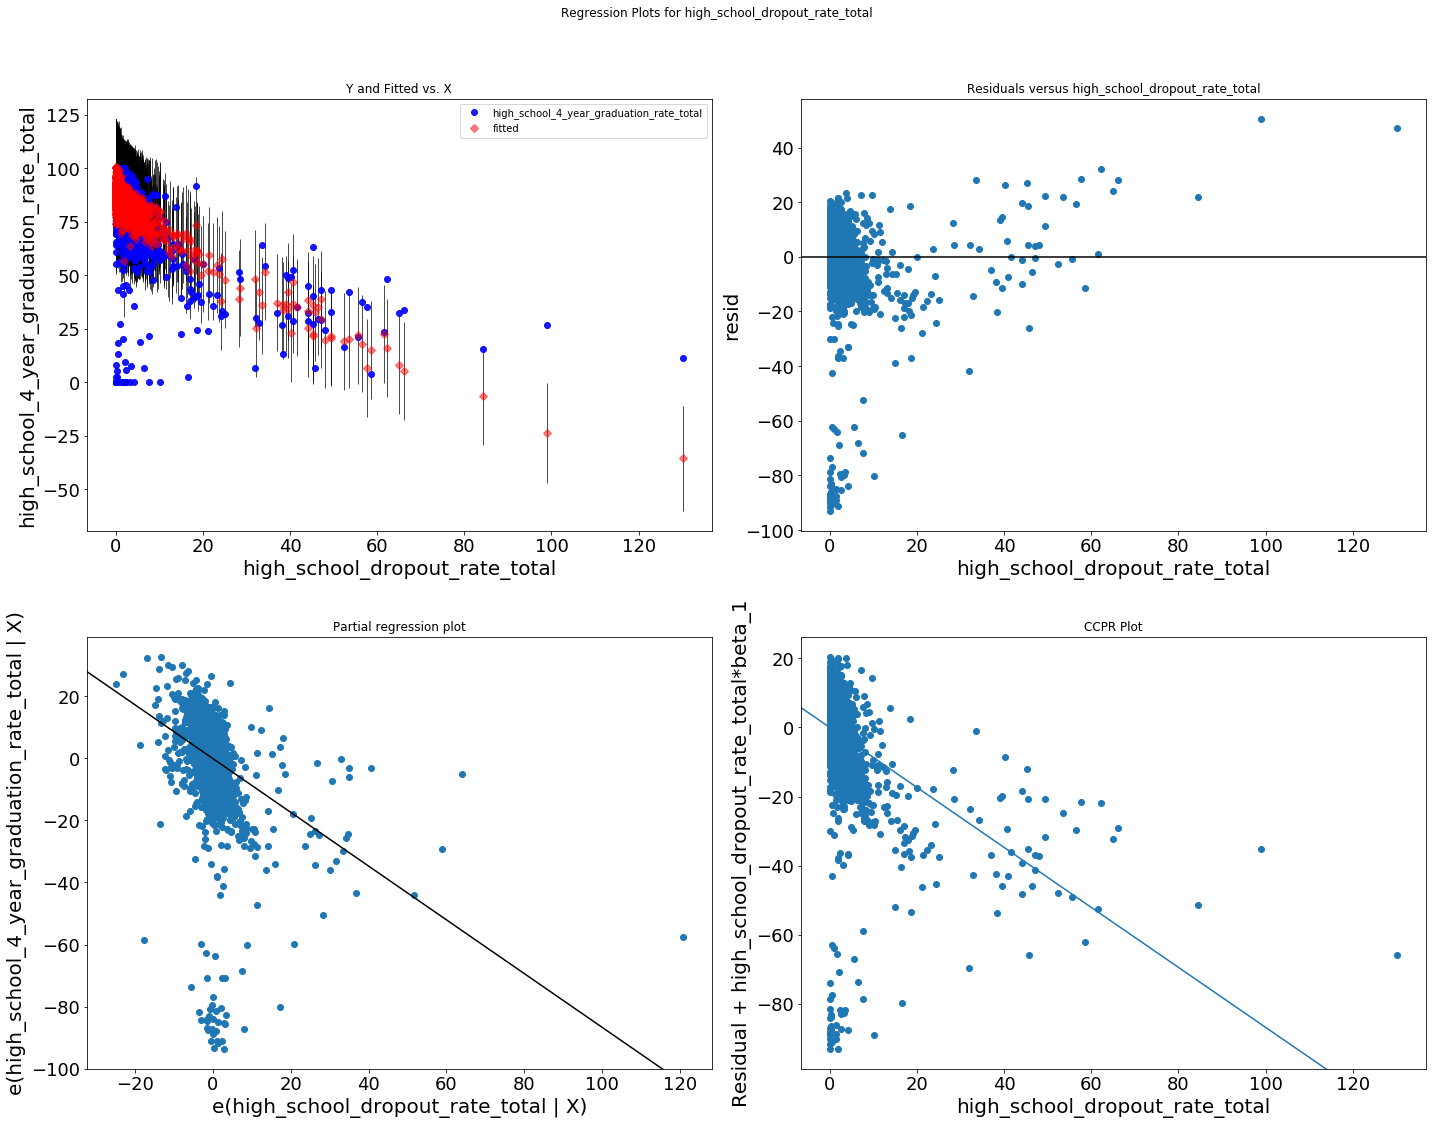

In [91]:
fig = plt.figure(figsize=(20,16))
fig = sm.graphics.plot_regress_exog(fsm, 'high_school_dropout_rate_total', fig=fig)
plt.show()

I need to update my train, val and test sets removing 5-year graduation rate and save them as csv for modeling.

In [92]:
train_set_f = train_set.drop(['high_school_5_year_graduation_rate_total'], axis=1)
val_set_f = val_set.drop(['high_school_5_year_graduation_rate_total'], axis=1)
test_set_f = test_set.drop(['high_school_5_year_graduation_rate_total'], axis=1)

In [93]:
test_set_f.to_csv('../../data/test_set_f.csv', index=False)
val_set_f.to_csv('../../data/val_set_f.csv', index=False)
train_set_f.to_csv('../../data/train_set_f.csv', index=False)

#### Log transform target

before I forget, I want to see if log transforming the target helps with the left skewed distribution

In [94]:
log_set = train_set.drop(['high_school_4_year_graduation_rate_total'], axis=1)
log_set.high_school_4_year_graduation_rate_total_log = np.log(train_set.high_school_4_year_graduation_rate_total)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


ValueError: supplied range of [-inf, 4.605170185988092] is not finite

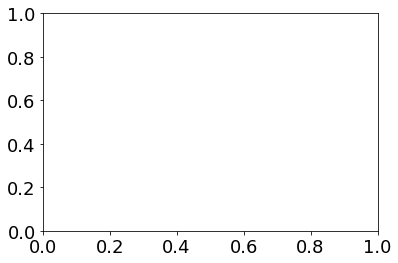

In [95]:
log_set.high_school_4_year_graduation_rate_total_log.hist(bins = 25, color='#003f5a')
plt.show();